# Medical Cost Personal Insurance Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
df=pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='charges', ylabel='Density'>

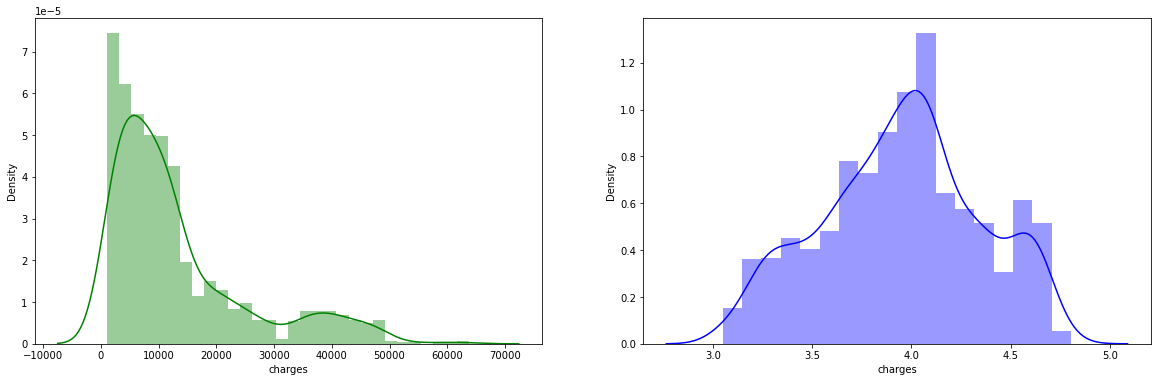

In [7]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.distplot(df.charges, color = 'g')

plt.subplot(1,2,2)
sns.distplot(np.log10(df.charges), color = 'b')

Text(0.5, 1.0, 'Distribution of BMI')

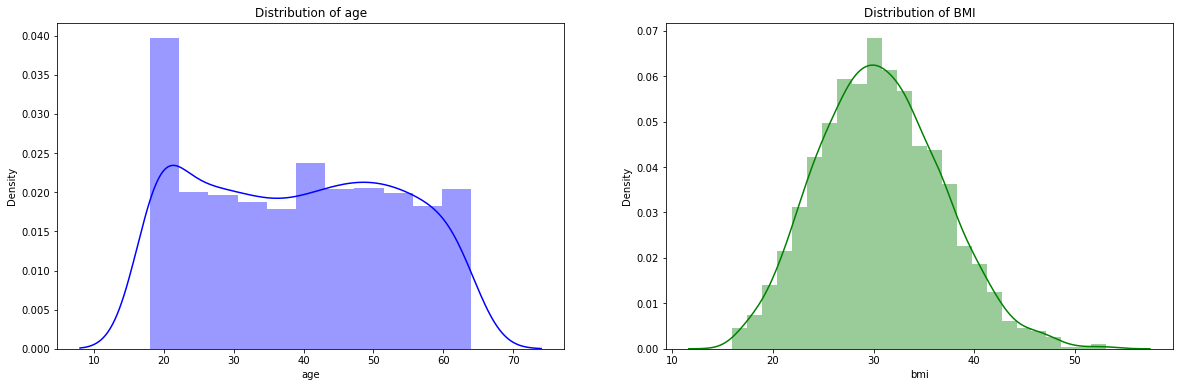

In [8]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.distplot(df.age, color = 'b').set_title('Distribution of age')

plt.subplot(1,2,2)
sns.distplot(df.bmi, color = 'g').set_title('Distribution of BMI')

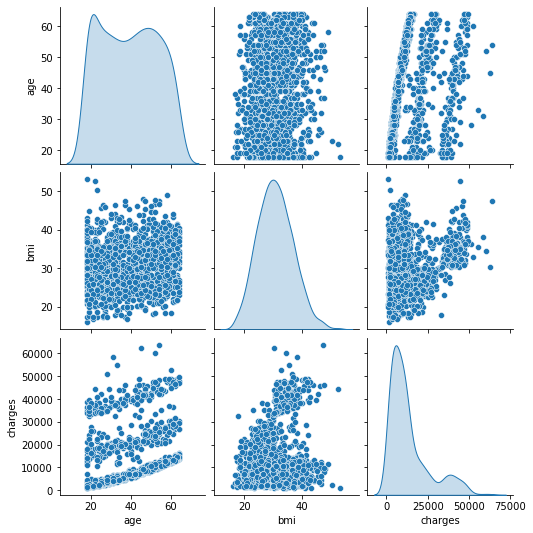

In [9]:
df_num = df[['age','bmi','charges']]
sns.pairplot(df_num, diag_kind = 'kde')
plt.show()


<AxesSubplot:xlabel='smoker', ylabel='charges'>

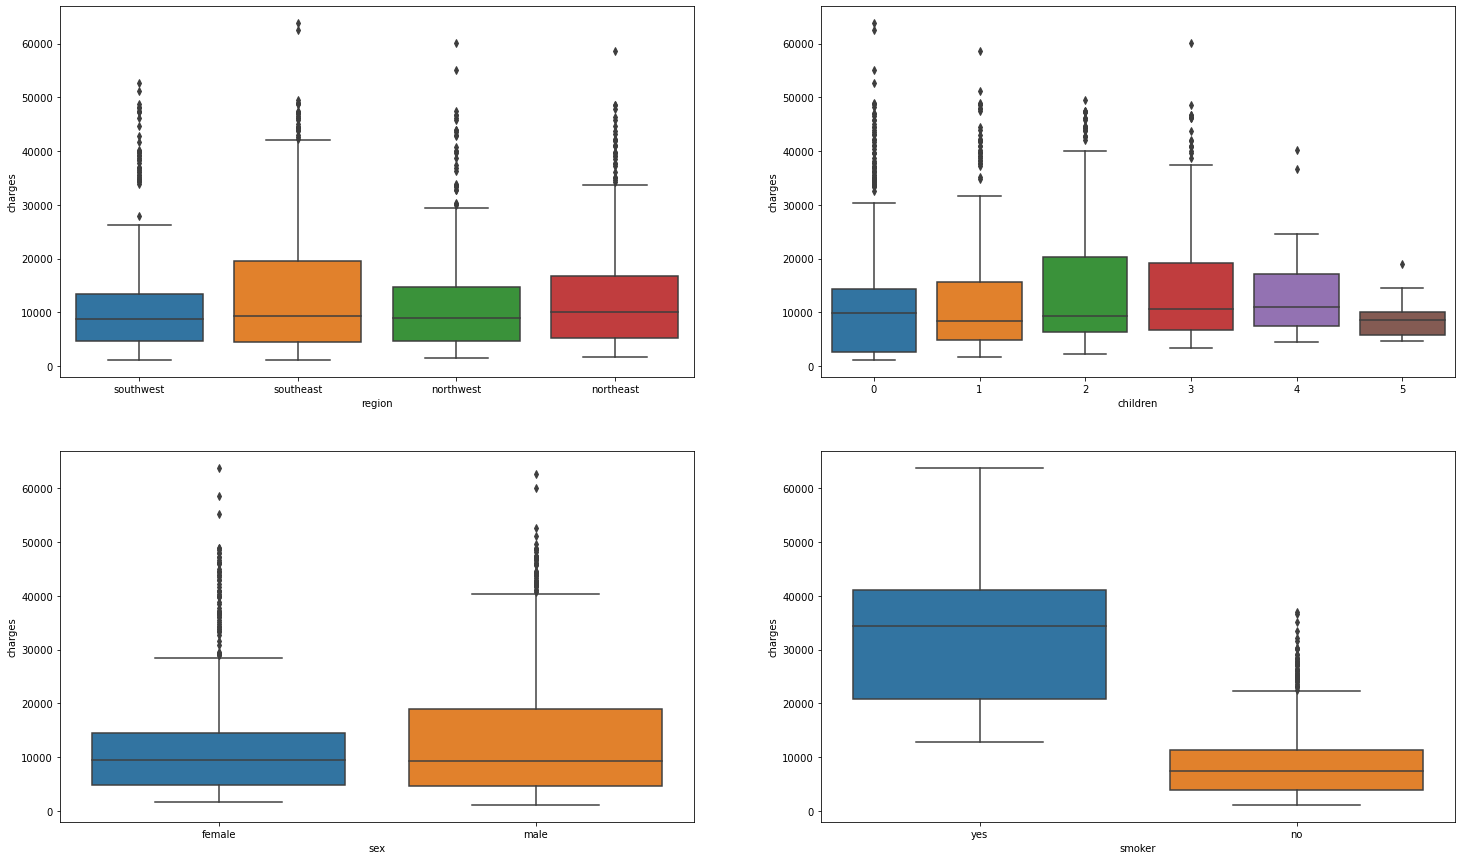

In [10]:
plt.figure (figsize = (25,15))
plt.subplot(2,2,1)
sns.boxplot(x = 'region', y = 'charges', data = df)

plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = df)

plt.subplot(2,2,3)
sns.boxplot(x = 'sex', y = 'charges', data = df)

plt.subplot(2,2,4)
sns.boxplot(x = 'smoker', y = 'charges', data = df)

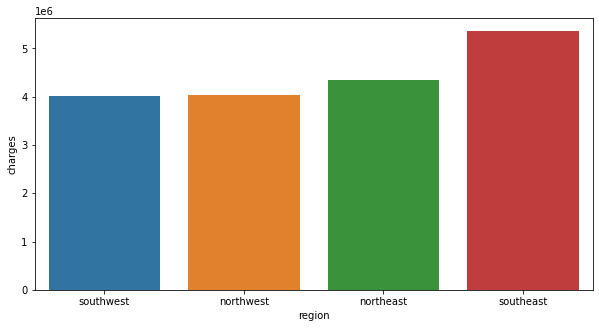

In [11]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
plt.figure(figsize=(10,5))
ax = sns.barplot(x = charges.index, y = charges)

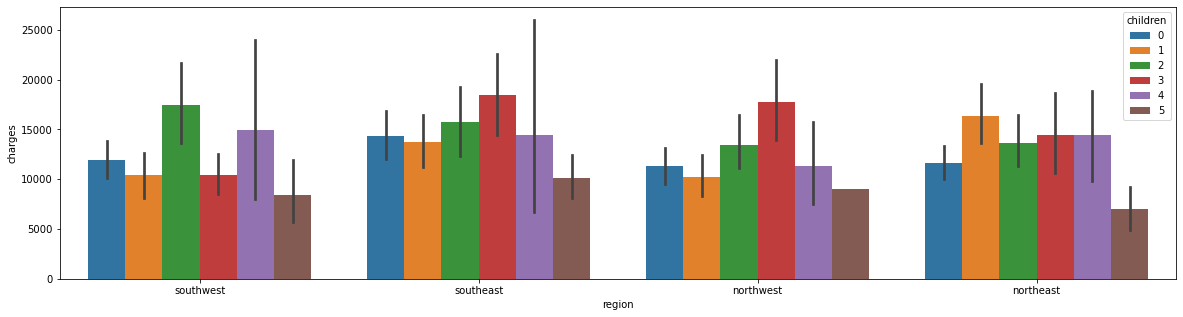

In [12]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = df)


<AxesSubplot:xlabel='region', ylabel='charges'>

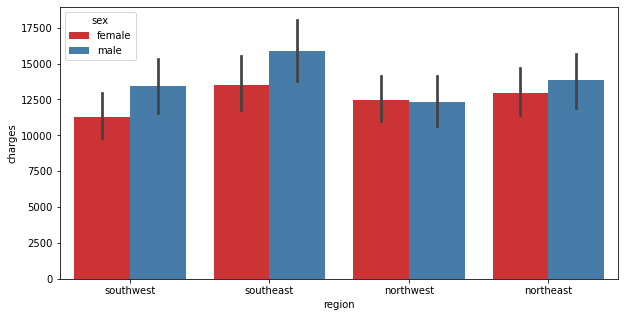

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df, palette = 'Set1')

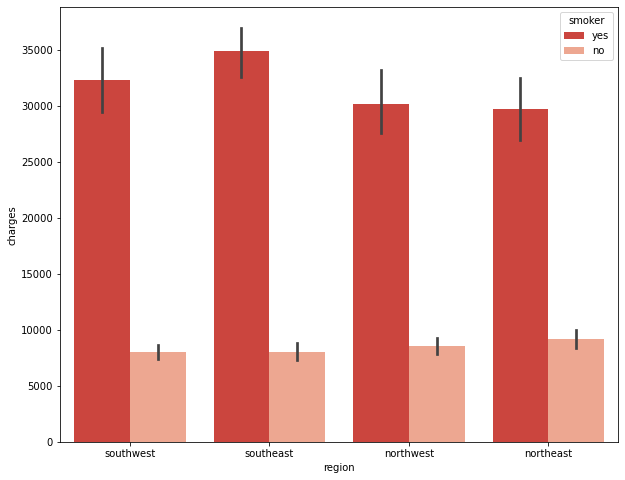

In [14]:
f, ax = plt.subplots(1, 1, figsize = (10, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df, palette = 'Reds_r')


Text(0.5, 1.0, 'Number of children vs Medical Charges')

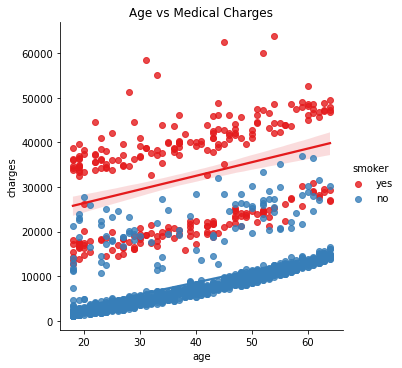

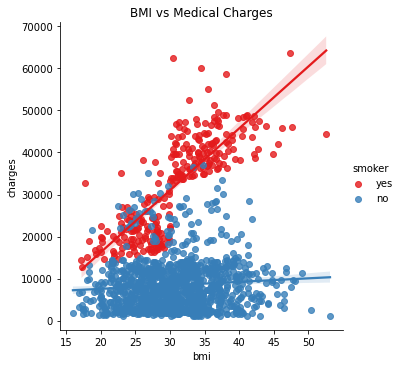

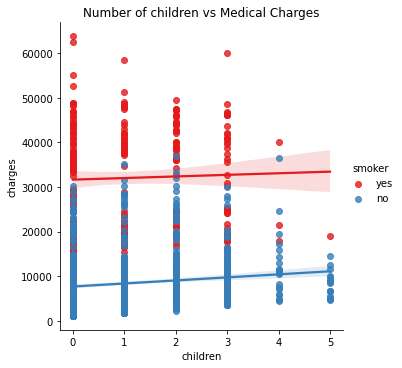

In [15]:
ax = sns.lmplot(x = 'age', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Age vs Medical Charges')

ax = sns.lmplot(x = 'bmi', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('BMI vs Medical Charges')

ax = sns.lmplot(x = 'children', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Number of children vs Medical Charges')

In [16]:
df[['region','sex','smoker']] = df[['region','sex','smoker']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

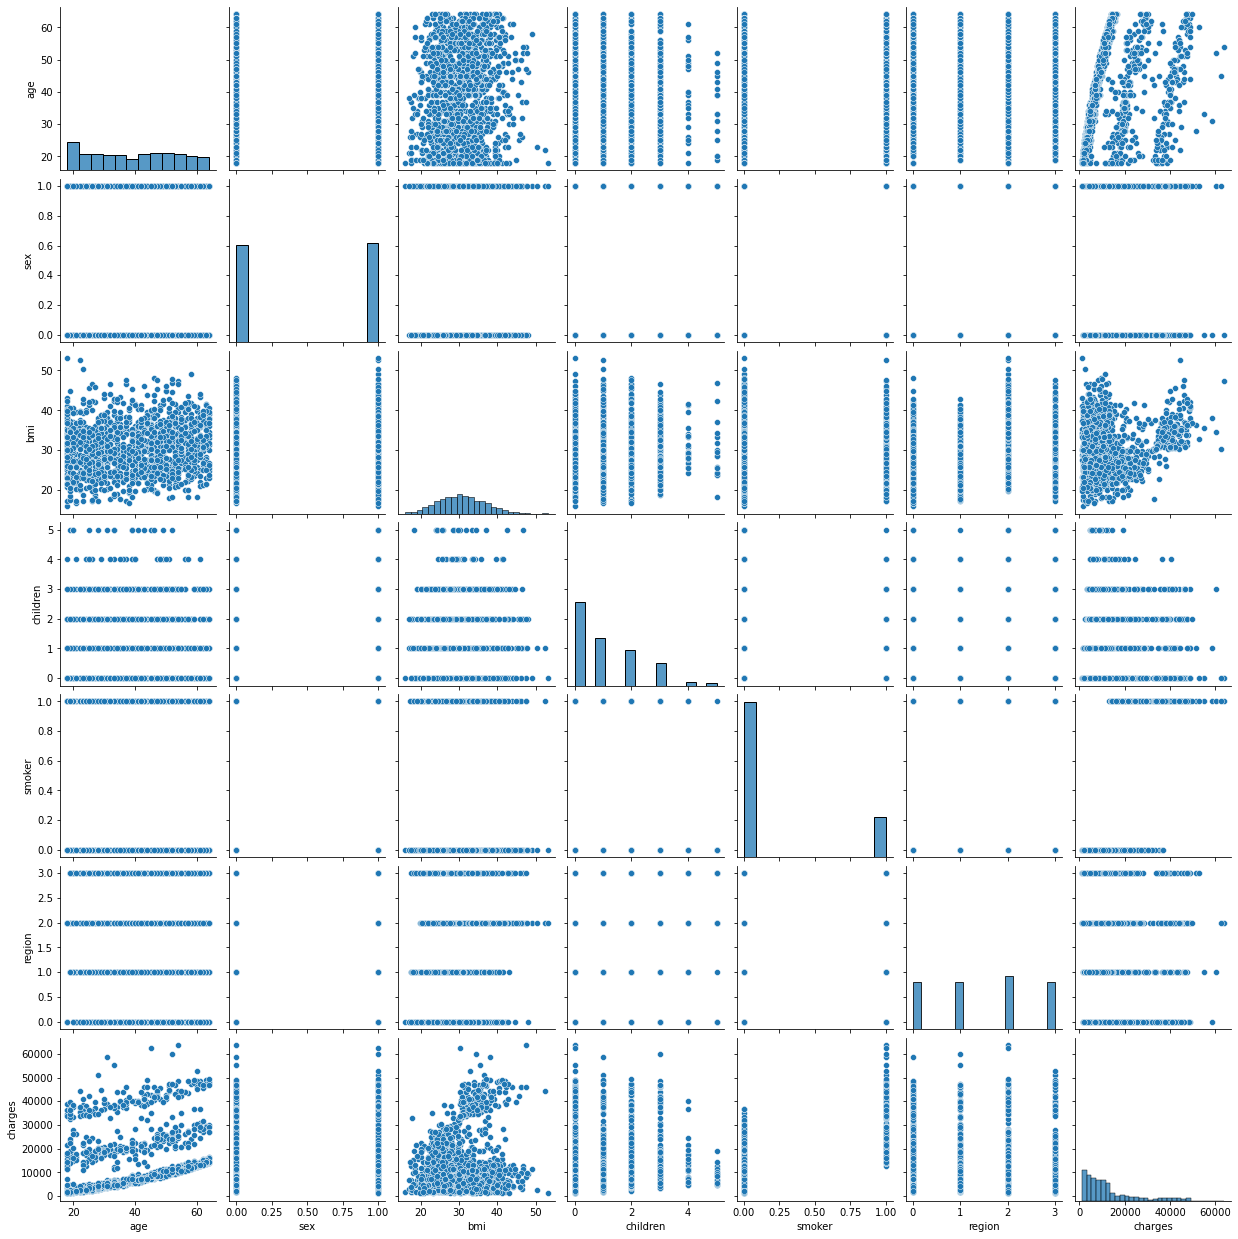

In [18]:
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Factors Heat Map')

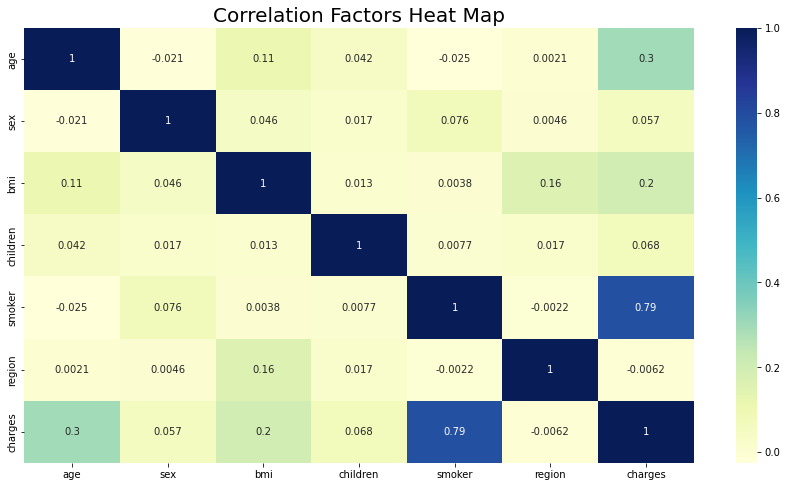

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')


In [20]:
features = df.drop(['charges'], axis = 1)
targets = df['charges']

In [21]:
x_train, x_test, y_train, y_test = holdout(features, targets, test_size = 0.2, random_state = 0)

In [22]:
Lin_reg_model = LinearRegression()
Lin_reg_model.fit(x_train, y_train)

print('Intercept:', Lin_reg_model.intercept_)
print('Coefficients:', Lin_reg_model.coef_)

Intercept: -11661.98390882442
Coefficients: [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]


In [26]:
from sklearn.ensemble import RandomForestRegressor as rfr

RFR = rfr(n_estimators = 100, criterion = 'mse', random_state = 0, n_jobs = -1)
RFR.fit(x_train, y_train)

x_train_predic = RFR.predict(x_train)
x_test_predic = RFR.predict(x_test)

train_mse = metrics.mean_squared_error(x_train_predic, y_train)
test_mse = metrics.mean_squared_error(x_test_predic, y_test)
print('Mean Squared Error train data: %.3f\nMean Squared Error test data: %.3f\n' % (train_mse, test_mse))

print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(train_mse)), 
    np.sqrt(np.absolute(train_mse))))

print('R2 train data: %.3f\nR2 test data: %.3f\n' % (metrics.r2_score(x_train_predic, y_train),metrics.r2_score(x_test_predic, y_test)))

print('Model Accuracy Score:', (RFR.score(x_test, y_test))*100)

Mean Squared Error train data: 3778409.061
Mean Squared Error test data: 20561948.169

RMSE train data: 1.94e+03, 
RMSE test data: 1.94e+03

R2 train data: 0.971
R2 test data: 0.861

Model Accuracy Score: 87.0785187973657


1.smoker(0.606920)
2.bmi(0.215579)
3.age(0.136042)
4.children(0.021231)
5.region(0.014214)
6.sex(0.006014)


<BarContainer object of 6 artists>

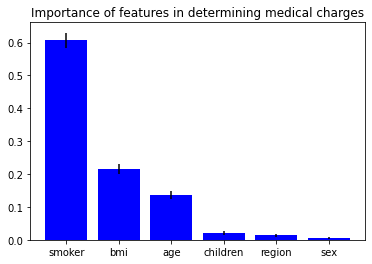

In [25]:
importances = RFR.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFR.estimators_], axis = 0)

indices = np.argsort(importances)[::-1]
variables = ['age', 'sex','bmi', 'children','smoker','region']

imp_list = []
for value in range(features.shape[1]):
    variable = variables[indices[value]]
    imp_list.append(variable)
    print('%d.%s(%f)' % (value + 1, variable, importances[indices[value]]))
    
plt.figure()
plt.title('Importance of features in determining medical charges')
plt.bar(imp_list, importances[indices], color = 'b', yerr = std[indices], align = 'center')

In [28]:
from sklearn.preprocessing import PolynomialFeatures
features = df.drop(['charges','sex','region'], axis = 1)
target = df.charges

pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(features)
x_train, x_test, y_train, y_test = holdout(x_pol, target, test_size = 0.2, random_state = 0)

In [29]:
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)

y_train_predic = Pol_reg.predict(x_train)
y_test_predic = Pol_reg.predict(x_test)

print('Intercept:', Pol_reg.intercept_)
print('Coefficients:', Pol_reg.coef_)

# Model Score
print('\nModel Accuracy Score:', (Pol_reg.score(x_test, y_test))*100)

Intercept: -5325.881705251295
Coefficients: [ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]

Model Accuracy Score: 88.12595703345225


In [35]:
targets.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [36]:
y_test_predic = Pol_reg.predict(x_test)

final_values = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_test_predic})
final_values

,Actual values,Predicted values
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268
